# Ploting in Pandas

In [ ]:
The kind of plot to produce:
    
    kind = - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        -'barh' : horizontal bar plot
        -'hist' : histogram
        -'box' : boxplot
        -'kde' : kernel density estimation plot
        -'density' : same as 'kde
        -'area' : area plot
        -'pie' : pie plot
        -'scatter' : scatter plot (dataframe only)
        -'hexbin' : hexbin plot (dataframe only)

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Line chart

<AxesSubplot:>

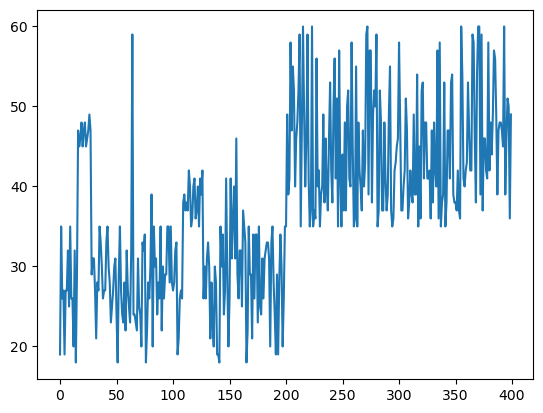

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Admin\Documents\User_Data1.csv")
df.describe()
df['Age'].plot()

# Scatter Plot

<AxesSubplot:xlabel='service', ylabel='salary'>

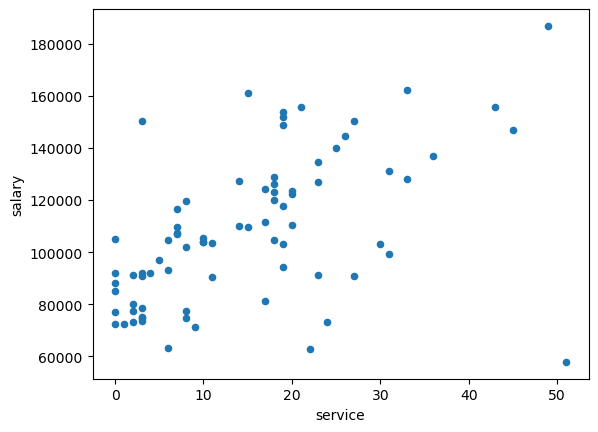

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"C:\Users\Admin\Documents\Salaries.csv")

df.plot(kind = 'scatter', x = 'service', y = 'salary')

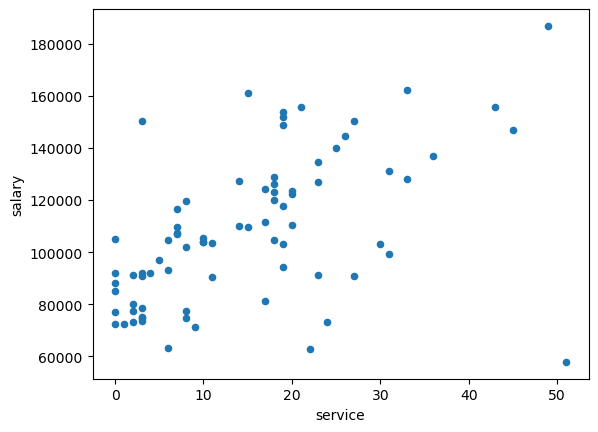

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Admin\Documents\Salaries.csv")
df.plot(kind = 'scatter', x = 'service', y = 'salary')
plt.show()

In [9]:
#correlation coefficient of service to salary varialbe.

print(df['service'].corr(df['salary']))

print(df['phd'].corr(df['salary']))

0.5321913486037866
0.5813556072724514


# Histogram

<AxesSubplot:ylabel='Frequency'>

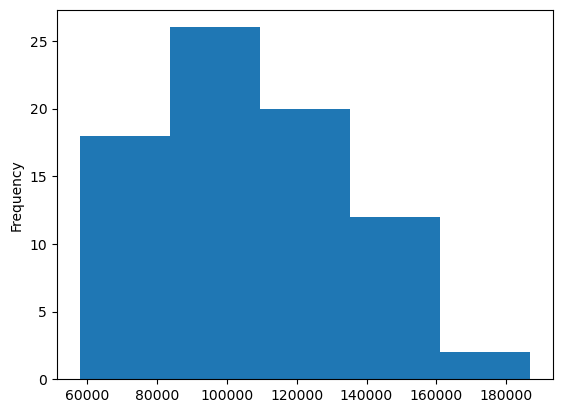

In [26]:
df["salary"].plot(kind = 'hist',bins = 5)

<AxesSubplot:ylabel='Frequency'>

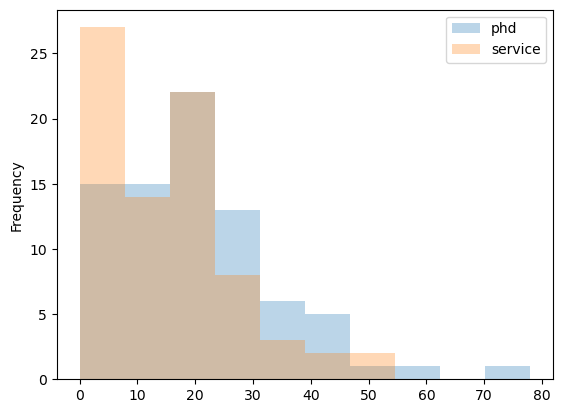

In [28]:
df[["phd","service"]].plot(kind = 'hist',bins = 10,alpha = 0.3)

# bar and BARh chart

In [20]:
df['rank'].value_counts()

Prof         46
AsstProf     19
AssocProf    13
Name: rank, dtype: int64

rank
Prof         123624.80
AssocProf     91786.23
AsstProf      81362.79
Name: salary, dtype: float64


<AxesSubplot:xlabel='rank'>

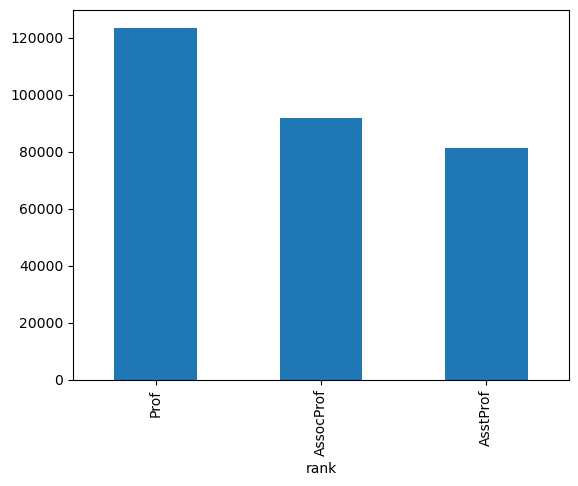

In [29]:
import pandas as pd

##---------Group by

Rank_totals = round(df.groupby("rank")["salary"].mean(),2).sort_values(ascending = False)
print(Rank_totals)
Rank_totals.plot(kind = 'bar')

rank       sex   
AsstProf   Female     78049.909091
           Male       85918.000000
AssocProf  Female     88512.800000
           Male      102697.666667
Prof       Female    121967.611111
           Male      124690.142857
Name: salary, dtype: float64


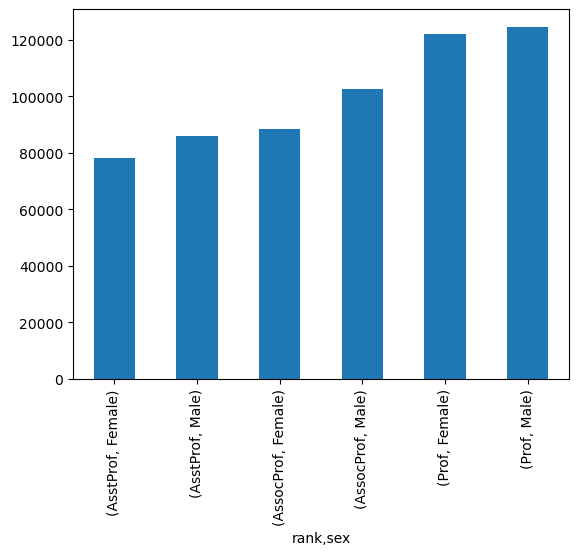

In [31]:

Rank_totals = df.groupby(["rank","sex"])["salary"].mean().sort_values()
print(Rank_totals)
Rank_totals.plot(kind = 'bar',stacked = True)
plt.show()

In [32]:
Rank_totals = df.groupby("rank")[["service","phd"]].mean().sort_values(by = 'service',ascending = False)

print(Rank_totals)

             service        phd
rank                           
Prof       21.413043  27.065217
AssocProf  11.307692  15.076923
AsstProf    2.210526   5.052632


<AxesSubplot:xlabel='rank'>

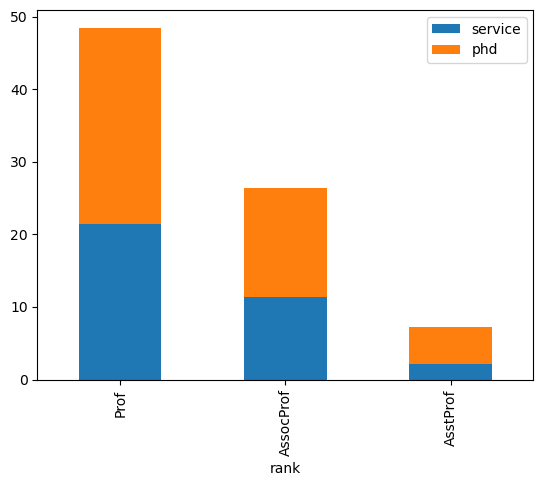

In [33]:
Rank_totals.plot(kind = 'bar',stacked = True)

# pie chart

array([<AxesSubplot:ylabel='service'>, <AxesSubplot:ylabel='phd'>],
      dtype=object)

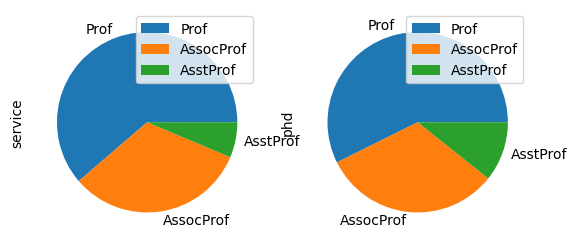

In [34]:
Rank_totals.plot(kind = 'pie',subplots = True)

array([<AxesSubplot:title={'center':'service'}, xlabel='rank'>,
       <AxesSubplot:title={'center':'phd'}, xlabel='rank'>], dtype=object)

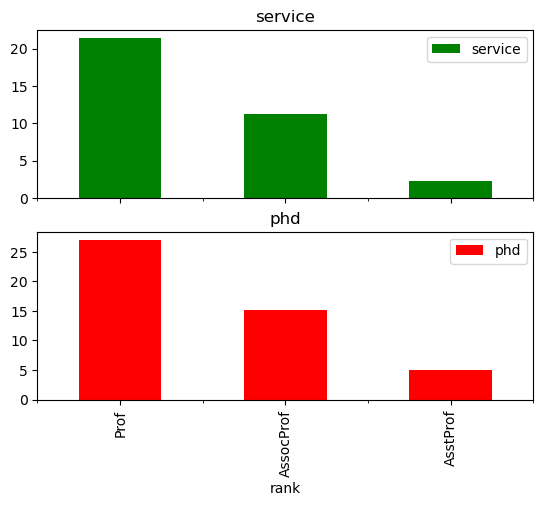

In [39]:
 Rank_totals.plot.bar(color = ['green','red'],subplots = True,rot = 90)

In [ ]:
Parameters
----------
x : label or position, optional
    Allows plotting of one column versus another. If not specified,
    the index of the DataFrame is used.
y : label or position, optional
    Allows plotting of one column versus another. If not specified,
    all numerical columns are used.
color : str, array-like, or dict, optional
    The color for each of the DataFrame's columns. Possible values are:

    - A single color string referred to by name, RGB or RGBA code,
        for instance 'red' or '#a98d19'.
        
        - A sequence of color strings referred to by name, RGB or RGBA
        code, which will be used for each column recursively. For
        instance ['green','yellow'] each column's bar will be filled in
        green or yellow, alternatively. If there is only a single column to
        be plotted, then only the first color from the color list will be
        used.

    - A dict of the form {column name : color}, so that each column will be
        colored accordingly. For example, if your columns are called `a` and
        `b`, then passing {'a': 'green', 'b': 'red'} will color bars for
        column `a` in green and bars for column `b` in red.

    .. versionadded:: 1.1.0

**kwargs
    Additional keyword arguments are documented in
    :meth:`DataFrame.plot`.

Returns
-------
matplotlib.axes.Axes or np.ndarray of them
    An ndarray is returned with one :class:`matplotlib.axes.Axes`
    per column when ``subplots=True``.

        See Also
        --------
        DataFrame.plot.barh : Horizontal bar plot.
        DataFrame.plot : Make plots of a DataFrame.
        matplotlib.pyplot.bar : Make a bar plot with matplotlib.


# Box plot

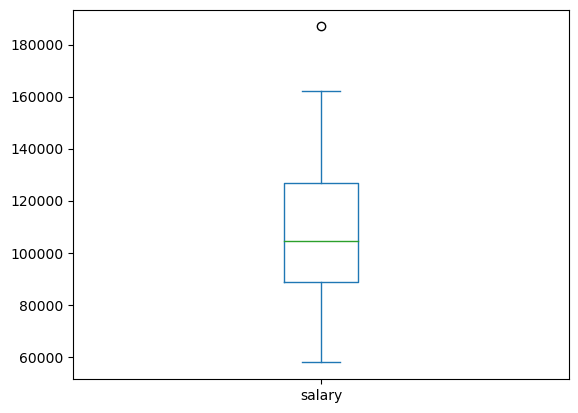

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Admin\Documents\Salaries.csv")

df['salary'].plot(kind = 'box')

plt.show()

<AxesSubplot:>

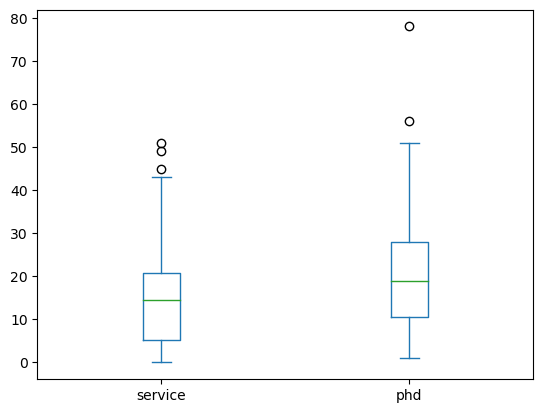

In [44]:
df[['service','phd',]].plot.box()
#1.5*IQR (IQR = Q3 - Q1)

In [45]:
import numpy as np

np.quantile(df['salary'],0.5)
q1 = np.quantile(df['salary'],0.25)
print('q1',q1)

q3 = np.quantile(df['salary'],0.75)
print('q3',q3)

iqr = (q3-q1)
print('iqr',iqr)

[q3-1.5*iqr, q1+1.5*iqr]

min,max = q3-1.5*iqr,q1+1.5*iqr
iqrrange = [min,max]
iqrrange

q1 nan
q3 nan
iqr nan


[nan, nan]

In [46]:
salary_in_range = df[(df['salary'] >= min) & (df['salary'] <= max)]
salary_in_range.describe()

,phd,service,salary,Unnamed: 6
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


<AxesSubplot:>

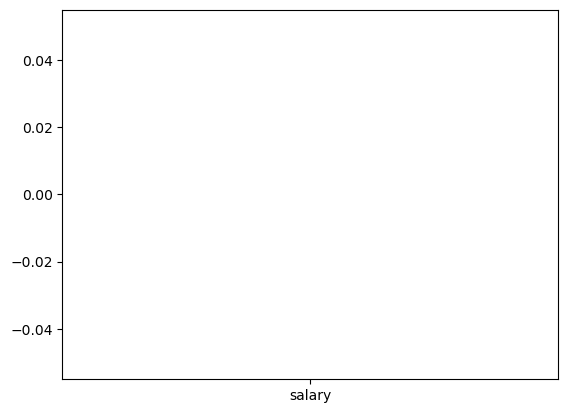

In [47]:
salary_in_range['salary'].plot(kind = 'box',vert = True)

<AxesSubplot:>

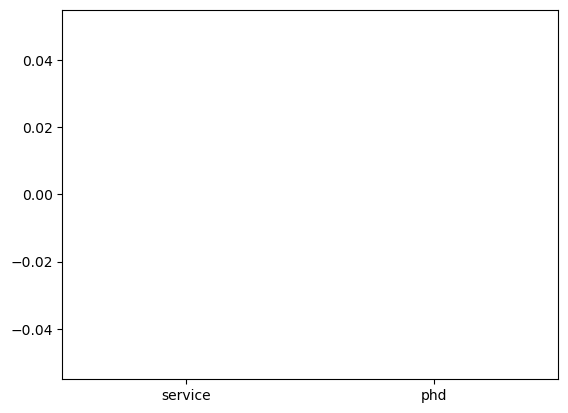

In [48]:
#box plot for multiple variable 

salary_in_range[['service','phd']].plot(kind = 'box')

<AxesSubplot:>

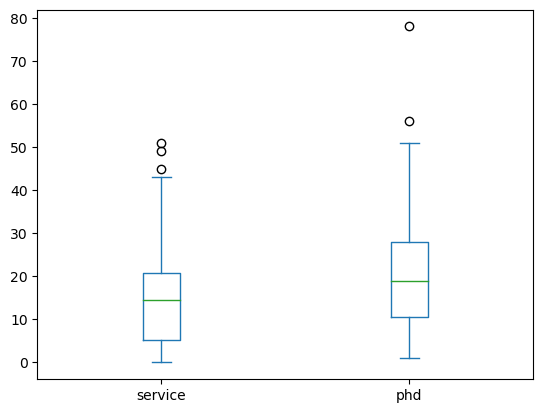

In [49]:
df[['service','phd']].plot(kind = 'box')

# KDE Plot

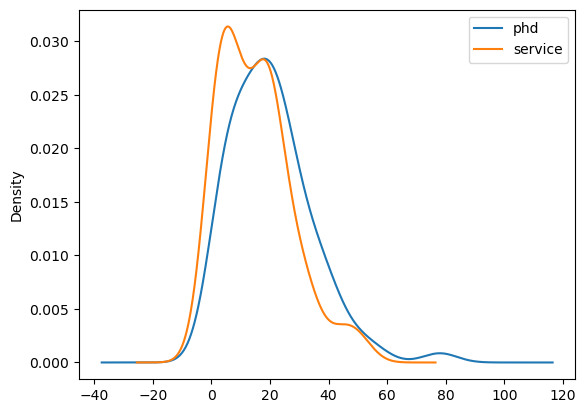

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Admin\Documents\Salaries.csv")

df[['phd','service']].plot(kind = 'kde')

plt.show()

# Area Plot

<AxesSubplot:>

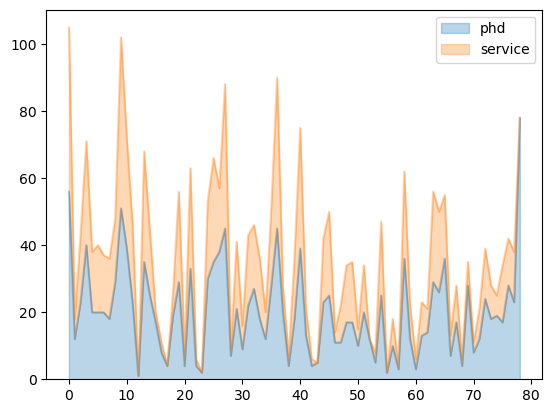

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df[['phd','service']].plot(kind = 'area',alpha = 0.3)

# Hexabin Plot

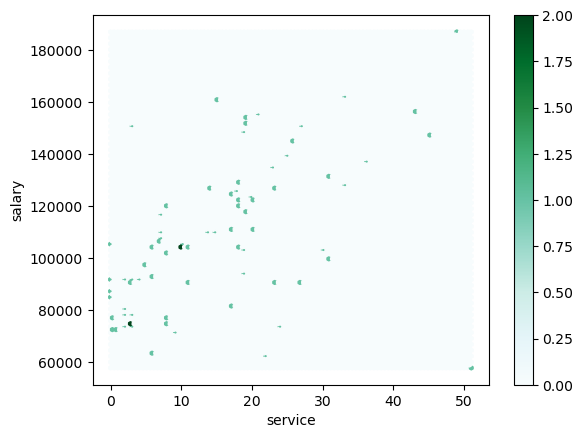

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Admin\Documents\Salaries.csv")

df.plot(kind = 'hexbin',x = 'service',y = 'salary')

plt.show()

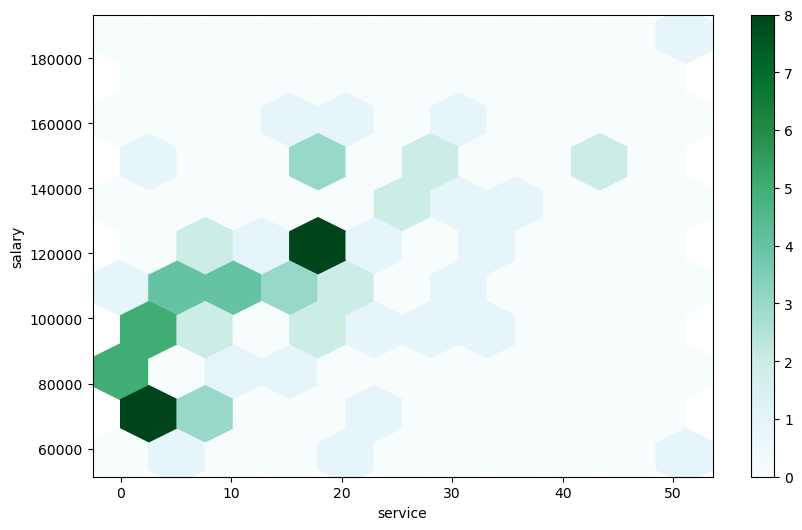

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Admin\Documents\Salaries.csv")

df.plot(kind = 'hexbin',x = 'service',y = 'salary',gridsize=10,figsize=(10,6))

plt.show()

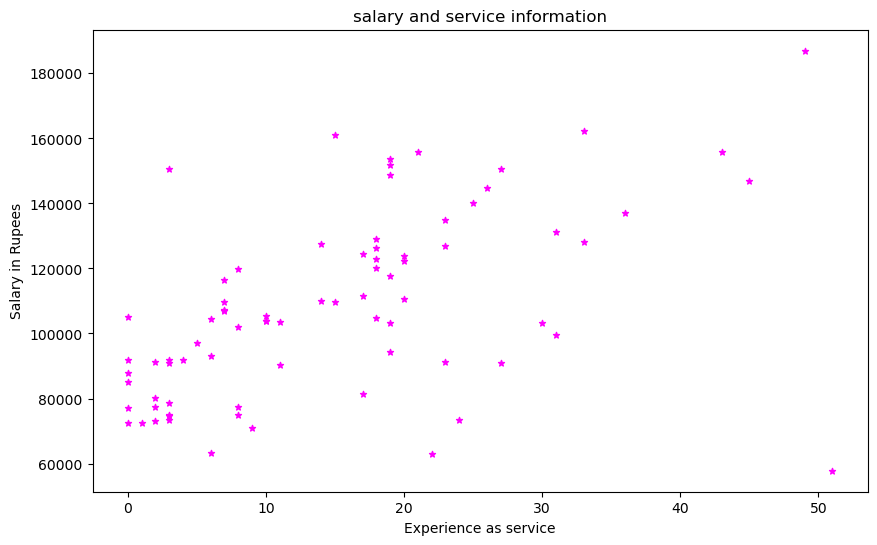

In [59]:
df.plot(kind = 'scatter',x = 'service',y = 'salary',figsize=(10,6),
        title='salary and service information',ylabel = 'Salary in Rupees',
        xlabel = 'Experience as service',marker = '*',color = 'magenta');

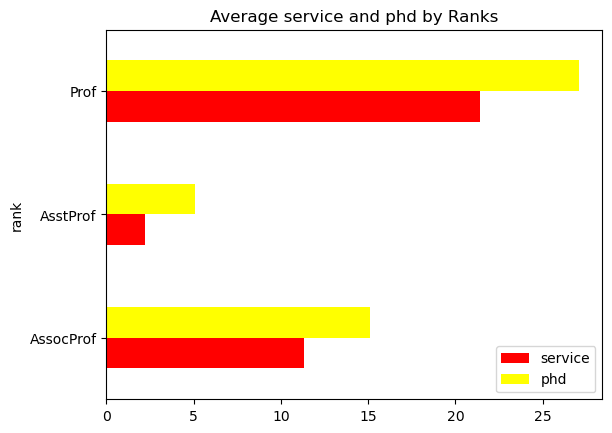

In [58]:
Rank_totals = df.groupby("rank")[["service","phd"]].mean()

Rank_totals.plot(kind = 'barh',title = 'Average service and phd by Ranks',color=['red','yellow'])

plt.show()

Text(0.0, 1.0, 'Mean salary by service and phd')

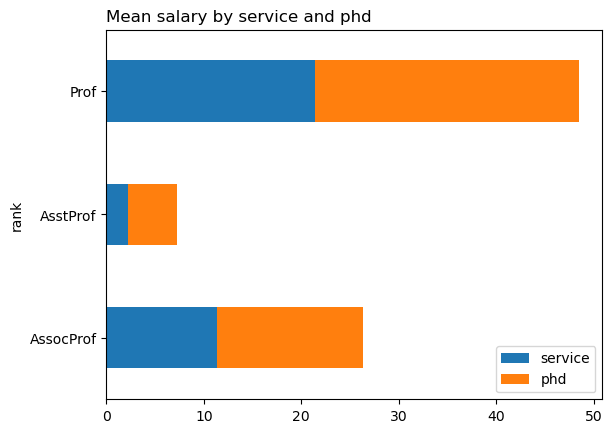

In [61]:
Rank_totals.plot(kind='barh',stacked=True)
plt.title(label = "Mean salary by service and phd",loc = 'left')

<AxesSubplot:ylabel='rank'>

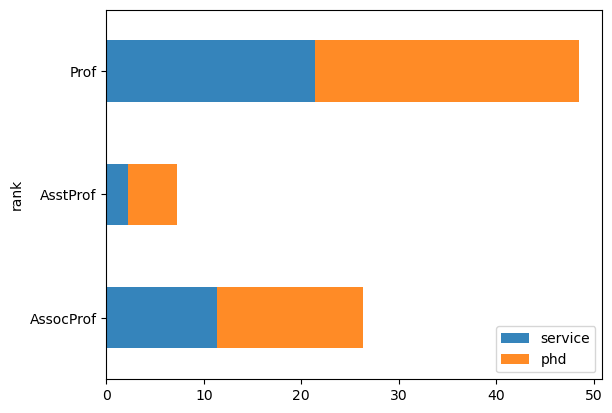

In [62]:
Rank_totals.plot(kind='barh',stacked=True,alpha = 0.9)

<AxesSubplot:>

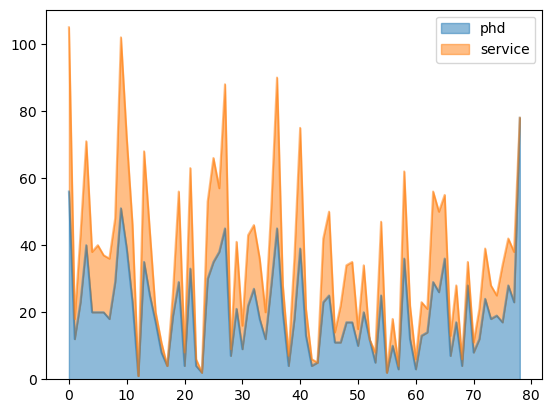

In [63]:
df[["phd","service"]].plot(kind = 'area',alpha = 0.5)

ValueError: zero-size array to reduction operation minimum which has no identity

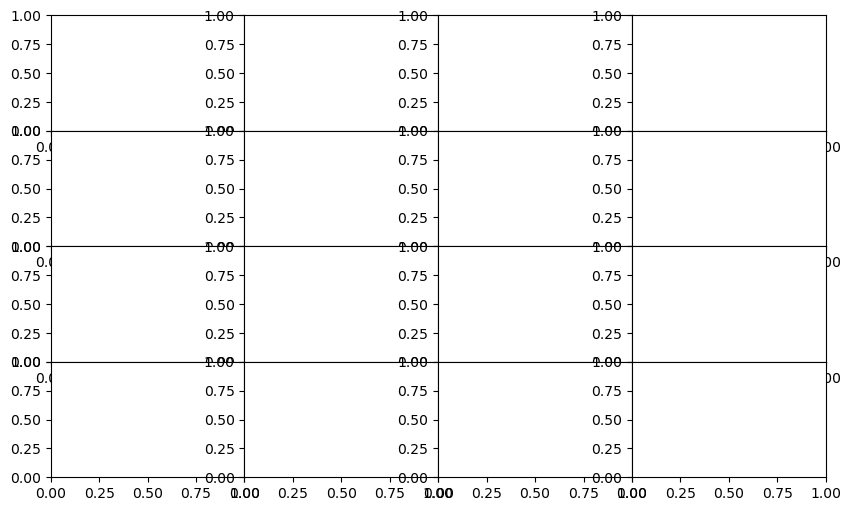

In [64]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1, figsize=(10, 6),diagonal = 'kde');

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        78 non-null     object 
 1   discipline  78 non-null     object 
 2   phd         79 non-null     int64  
 3   service     78 non-null     float64
 4   sex         78 non-null     object 
 5   salary      78 non-null     float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  15 non-null     object 
 8   Unnamed: 8  10 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 5.7+ KB


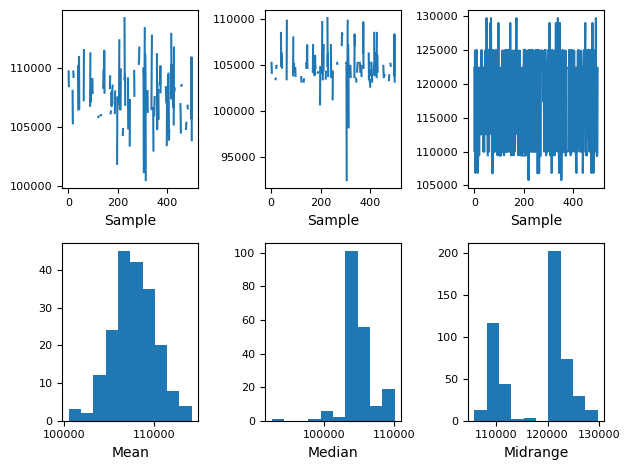

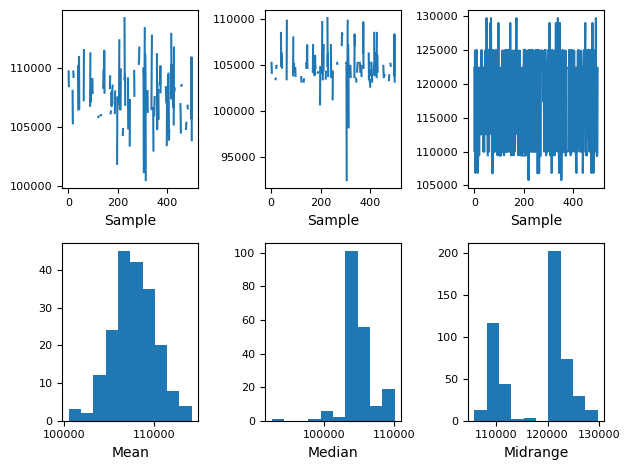

In [66]:
pd.plotting.bootstrap_plot(df['salary'])

# Ploting using matplotlib.pyplot

In [67]:
#! pip install matplotlib
import matplotlib.pyplot as plt

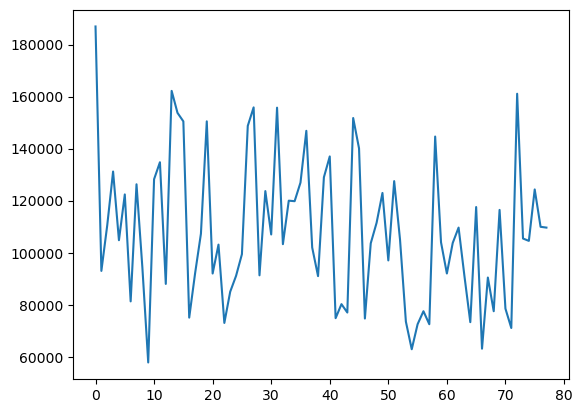

In [68]:
#line plot
plt.plot(df['salary'])

#function to show the plot
plt.show()